In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from time import time
from scipy import misc

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [3]:
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
## 设计到的相关参数
n_colors = 32

In [6]:
image = Image.open('datas/xiaoren.png')
image = np.array(image, dtype=np.float64) / 255
# 获取图片数据的维度/形状信息
original_shape = tuple(image.shape)
shape_size = len(original_shape)
w, h, d = original_shape[0], original_shape[1], 1
if shape_size == 3:
    d = original_shape[2]

#将图片数据设置为二维的，其中第二维是像素信息
image_v = np.reshape(image, (w * h, d))
#随机抽取10000条数据作为模型训练数据
image_v_sample = shuffle(image_v, random_state=28)[:10000]

In [7]:
t0 = time()
#模型构建
k_means = KMeans(n_clusters=n_colors, random_state=28)

k_means.fit(image_v_sample)
print("模型构建消耗时间:%.3fs" % (time() - t0))

模型构建消耗时间:1.394s


In [11]:
t0 = time()

labels = k_means.predict(image_v)
print("算法模型预测消耗时间:%.3fs" % (time() - t0))

算法模型预测消耗时间:0.167s


In [12]:
t0 = time()

codebook_random = shuffle(image_v, random_state=28)[:n_colors]

labels_random = pairwise_distances_argmin(image_v, codebook_random)
print("随机数据预测消耗时间:%.3fs" % (time() - t0))

随机数据预测消耗时间:0.174s


In [13]:
"""
重新构建一个图片数据(压缩图片数据)
codebook：各个类别的具体像素值集合(聚类中心/簇中心/类别中心)
labels：原始图片各个像素点的类别集合
w: 原始/新图片宽度
h：原始/新图片高度
"""
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    
    d = codebook.shape[1]
   
    image = np.zeros((w, h, d))
    
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

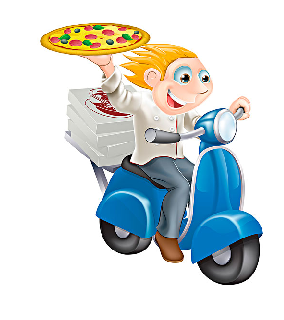

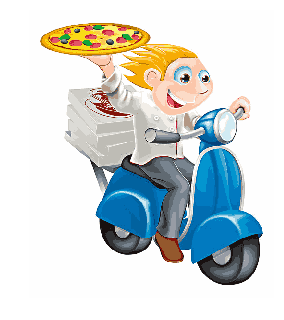

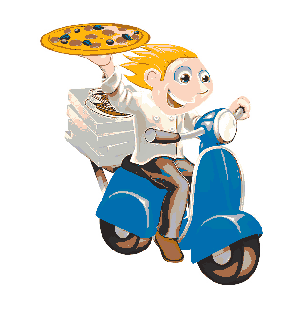

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [14]:
plt.figure(u"原始图片",facecolor='w')
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
if d == 1:
    plt.imshow(image, cmap=plt.cm.gray)
else:
    plt.imshow(image)

plt.figure(u'K-Means算法压缩图片',facecolor='w')
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
km_image = recreate_image(k_means.cluster_centers_, labels, w, h)
km_image.shape = original_shape
if d == 1:
    plt.imshow(km_image, cmap=plt.cm.gray)
else:
    plt.imshow(km_image)


plt.figure(u'随机抽取像素点压缩图片',facecolor='w')
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
random_image = recreate_image(codebook_random, labels_random, w, h)
random_image.shape = original_shape
if d == 1:
    plt.imshow(random_image, cmap=plt.cm.gray)
else:
    plt.imshow(random_image)

plt.show()

misc.imsave('datas/result_1.png', image)
misc.imsave('datas/result_2.png', km_image)
misc.imsave('datas/result_3.png', random_image)